# Import Libraries / Verify Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings('ignore') 

# Exploratory Data Analysis - Dataset1

In [3]:
raw = pd.read_csv("../Data/diabetes1_raw.csv")
raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(f"Number of rows: {raw.shape[0]}")
print(f"Number of features: {raw.shape[1]}")
print()
print(f"Class Imbalance: {268/768:.4f}")
print(raw["Outcome"].value_counts())

Number of rows: 768
Number of features: 9

Class Imbalance: 0.3490
0    500
1    268
Name: Outcome, dtype: int64


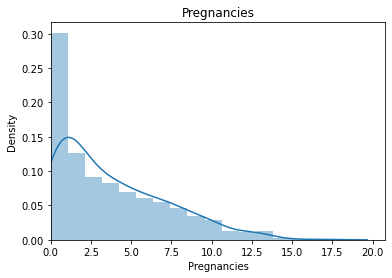

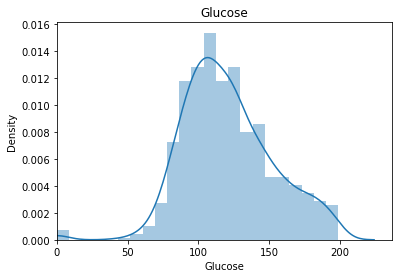

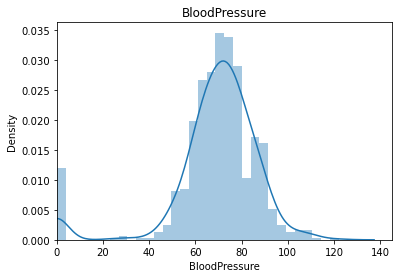

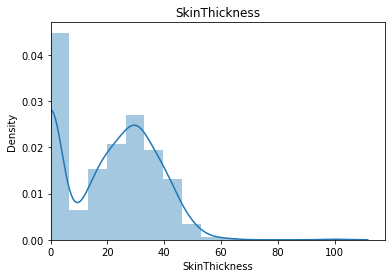

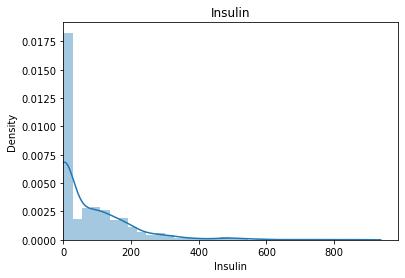

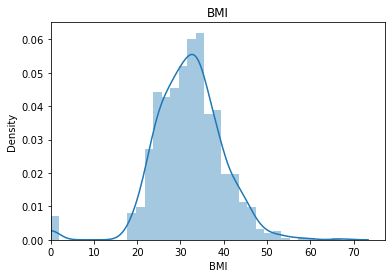

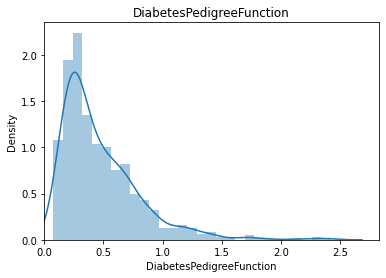

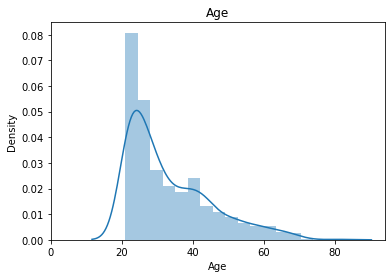

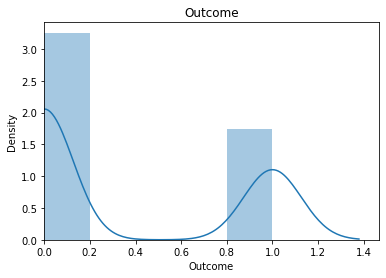

In [5]:
for feature in raw.columns:
    sns.distplot(raw.loc[:,feature])
    plt.xlim(0,)
    plt.title(feature)
    plt.show()

Although the dataset is not missing any values, notice the features 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' have many zero values. This is likely missing data so we will need to impute--some possible techniques include mean/median imputation, KNN imputation, and regression imputation. For now we will take the simplest approach of using mean imputation. When we implement predictive models later in the project the missing data will become much more important.

In [6]:
# Mean imputation
clean = raw.copy(deep=True)

impute_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for feature in impute_features:
    missing_idx = np.where(raw[feature]==0)[0]
    imputation_value = raw[~raw.index.isin(missing_idx)][feature].mean()
    clean.loc[missing_idx,feature] = imputation_value

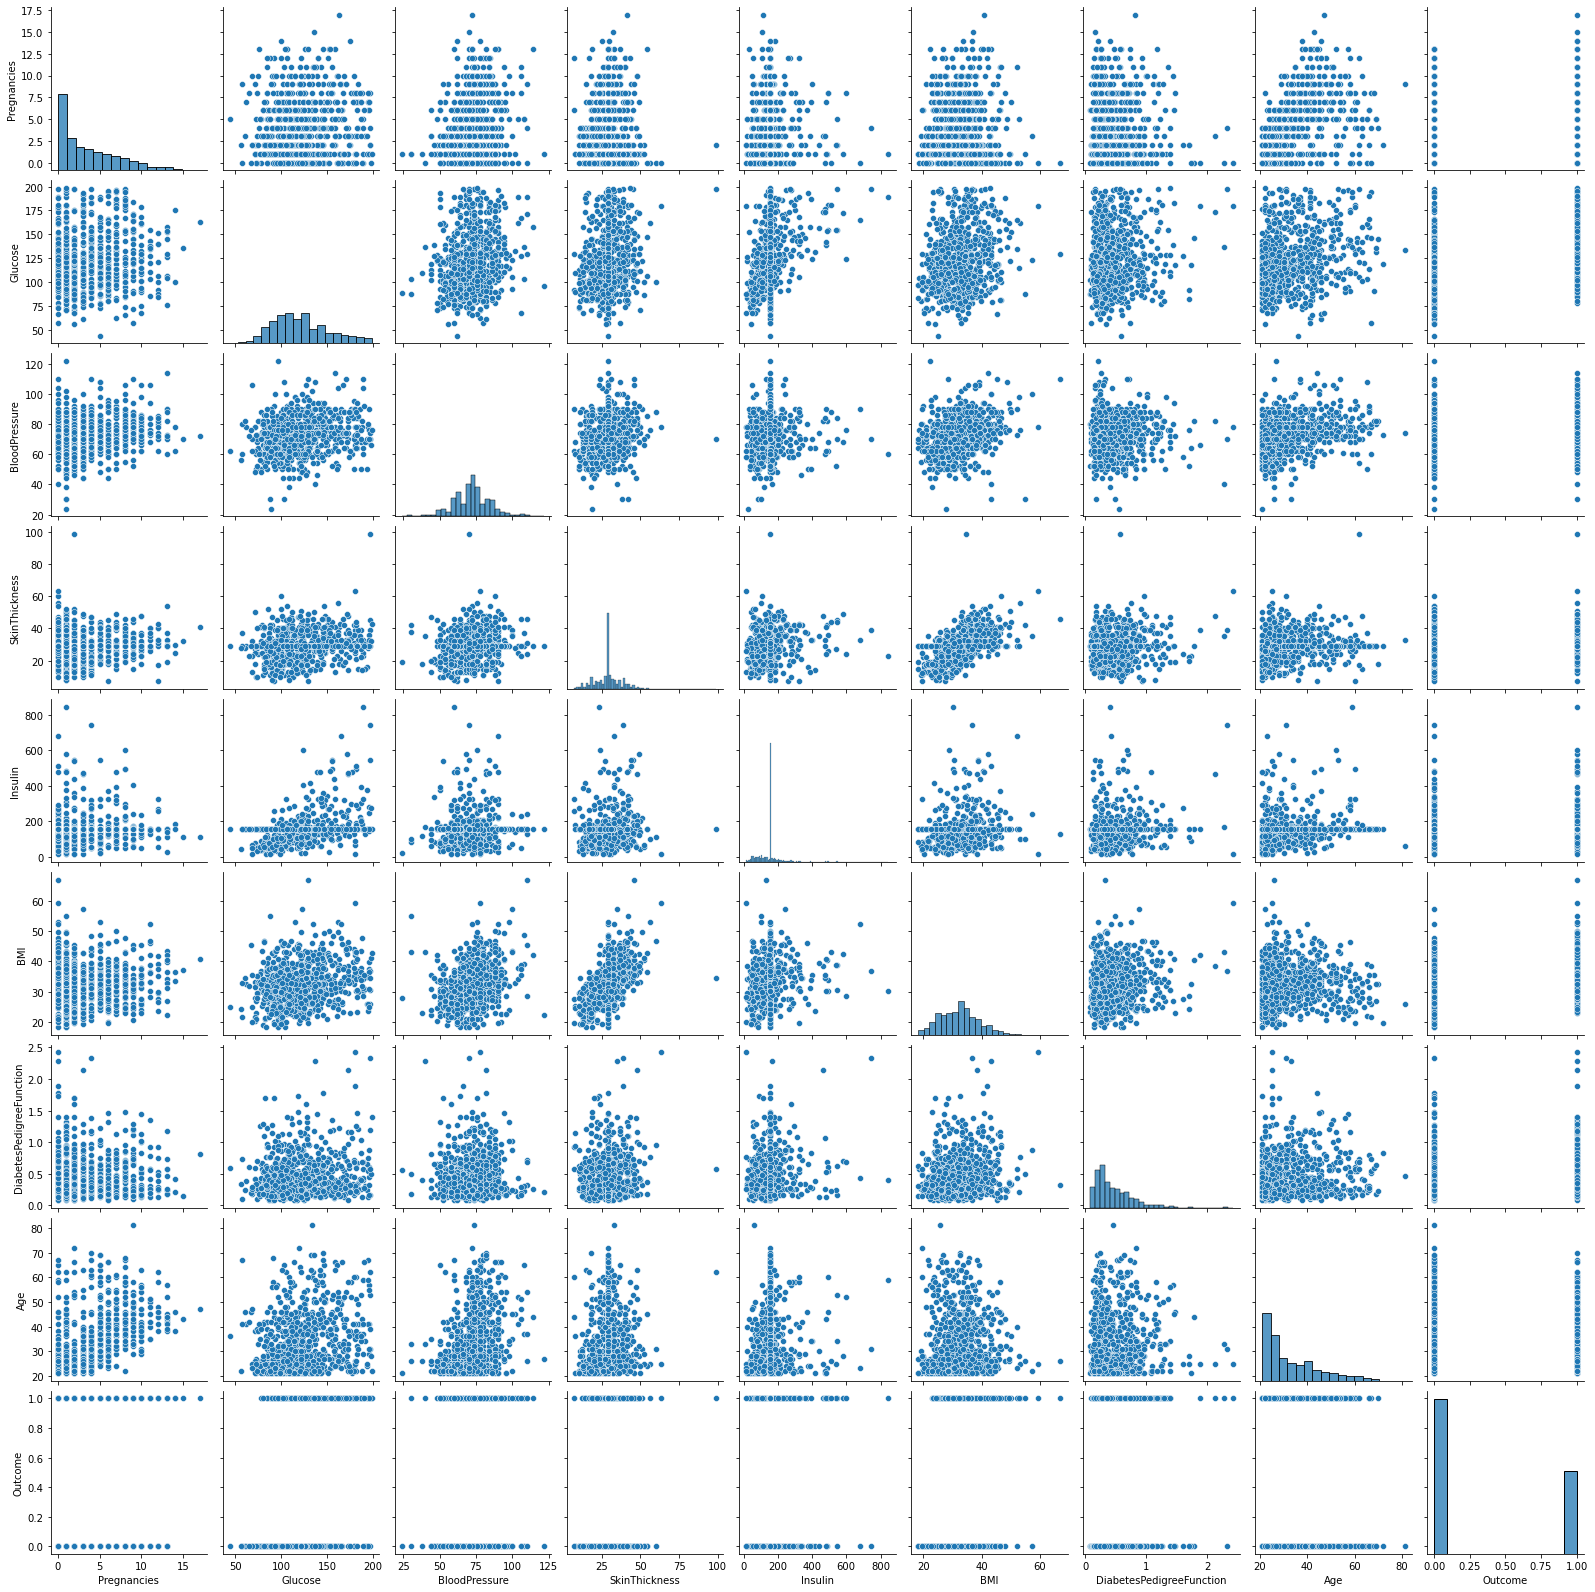

In [7]:
# Pairplot
sns.pairplot(clean)
plt.show()

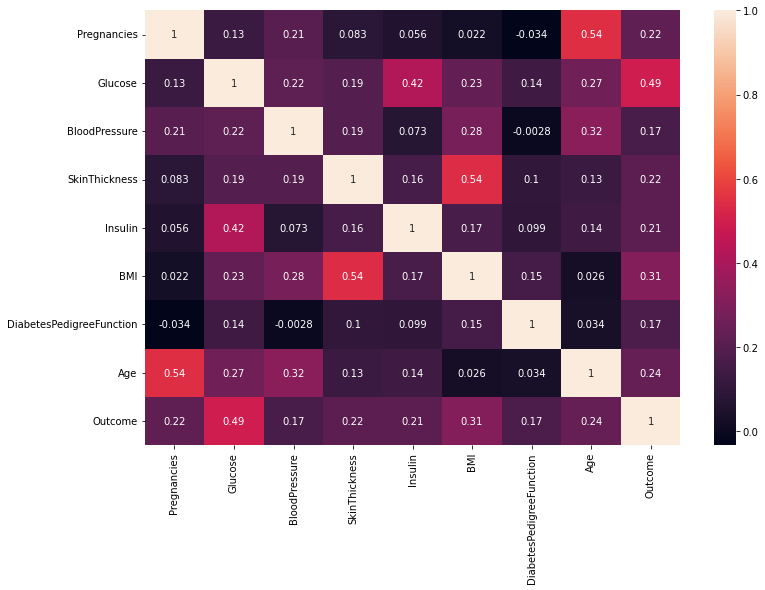

In [8]:
# Correlation Plot
plt.figure(figsize=(12,8))
sns.heatmap(clean.corr(),annot=True)
plt.show()

In [9]:
clean.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

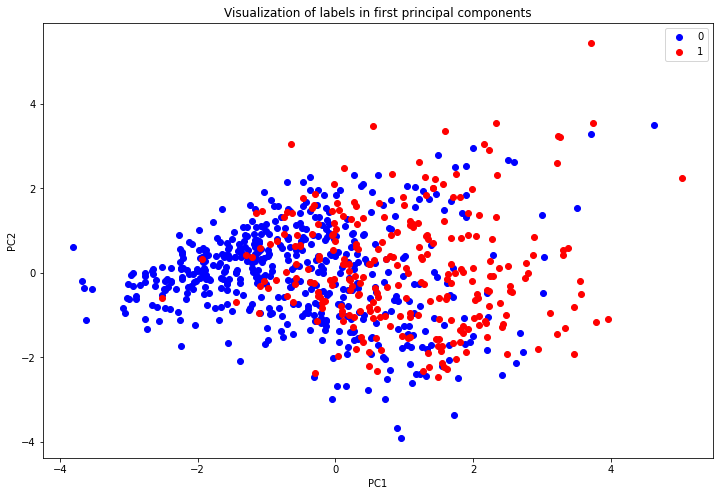

In [10]:
# PCA Plot
y_pca = clean["Outcome"]
X_pca = clean.drop(["Outcome"],axis=1)
X_pca = (X_pca - X_pca.mean())/(X_pca.std())
pca = PCA(n_components=2).fit(X_pca)
X_pca = pca.transform(X_pca)

plt.figure(figsize=(12,8))
color_dict = {1:"red",0:"blue"}
for label in [0,1]:
    idx = np.where(y_pca==label)
    plt.scatter(X_pca[idx,0],X_pca[idx,1],c=color_dict[label],label=label)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualization of labels in first principal components")
plt.legend()
plt.show()

# Exploratory Data Analysis - Dataset1

In [11]:
raw = pd.read_csv("../Data/diabetes2_raw.csv")
raw.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [12]:
print(f"Number of rows: {raw.shape[0]}")
print(f"Number of features: {raw.shape[1]}")
print()
print(f"Class Imbalance: {len(raw[raw['Diabetes_012']!=0])/len(raw):.4f}")
print(raw["Diabetes_012"].value_counts())

Number of rows: 253680
Number of features: 22

Class Imbalance: 0.1576
0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


In [13]:
# Define new outcome variable
raw["Diabetes"] = np.where(raw["Diabetes_012"]==0,0,1)

In [14]:
# Three types of features
binary_features = ["HighBP",
                   "HighChol",
                   "CholCheck",
                   "Smoker",
                   "Stroke",
                   "HeartDiseaseorAttack",
                   "PhysActivity",
                   "Fruits",
                   "Veggies",
                   "HvyAlcoholConsump",
                   "AnyHealthcare",
                   "NoDocbcCost",
                   "DiffWalk",
                   "Sex"]

numeric_features = ["BMI",
                    "GenHlth",
                    "MentHlth",
                    "PhysHlth",
                    "Age",
                    "Education",
                    "Income"]

response_features = ["Diabetes_012",
                     "Diabetes"]

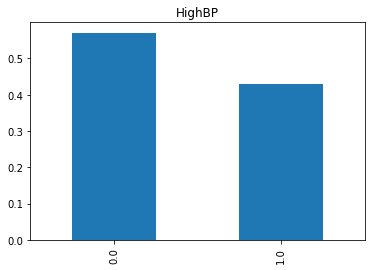

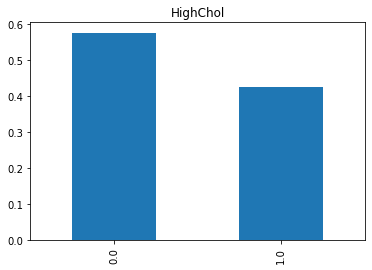

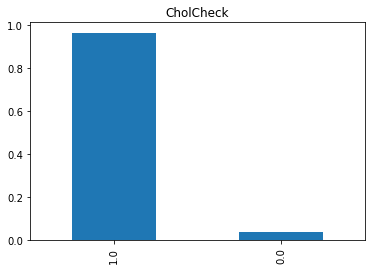

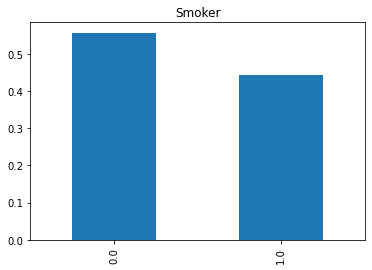

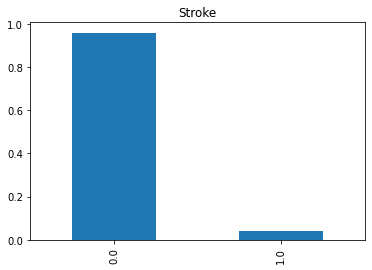

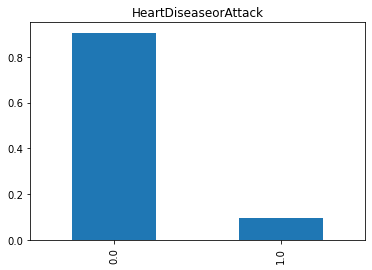

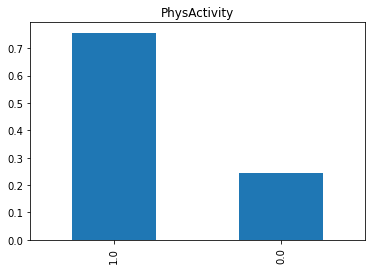

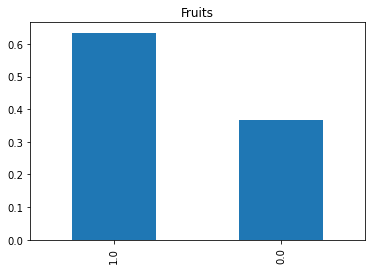

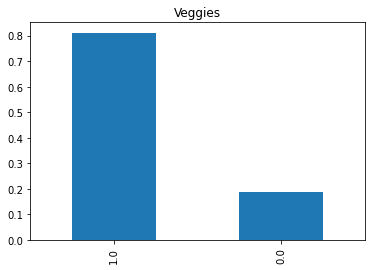

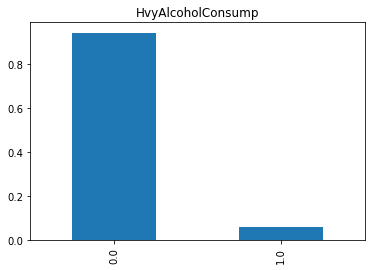

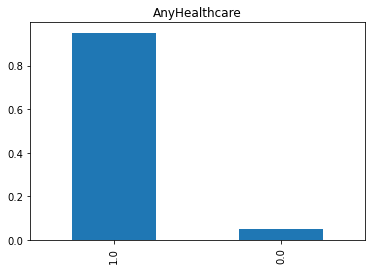

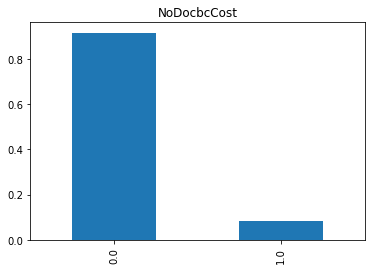

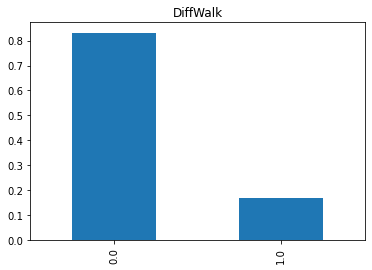

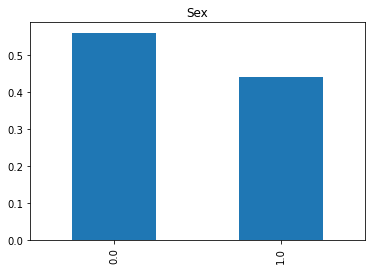

In [15]:
for feature in binary_features:
    raw[feature].value_counts(normalize=True).plot(kind="bar")
    plt.title(feature)
    plt.show()

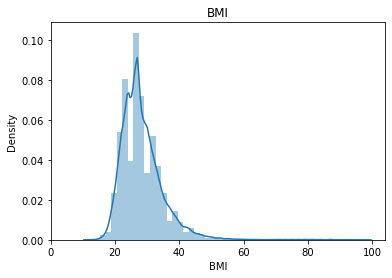

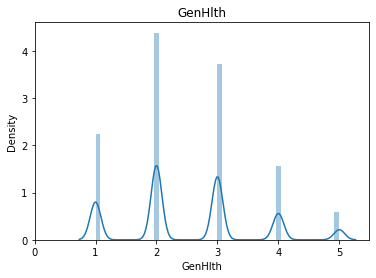

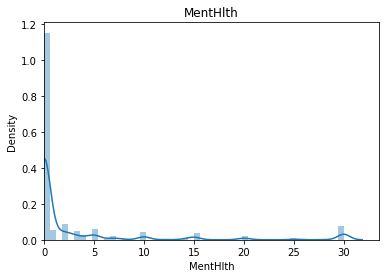

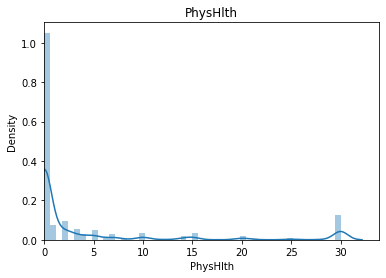

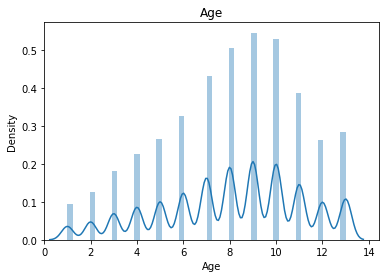

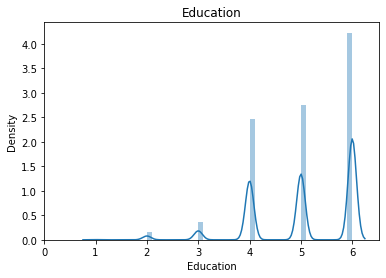

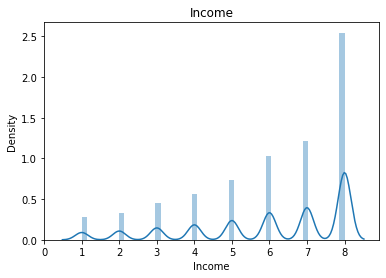

In [16]:
for feature in numeric_features:
    sns.distplot(raw.loc[:,feature])
    plt.xlim(0,)
    plt.title(feature)
    plt.show()    

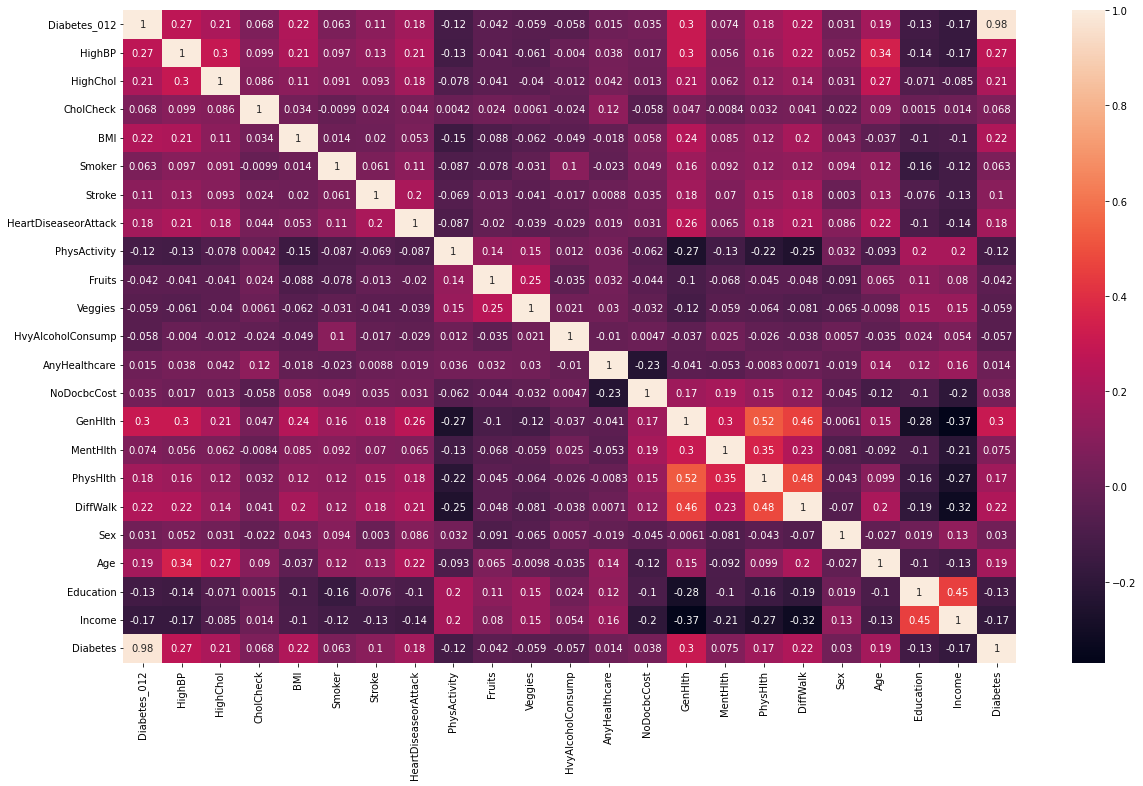

In [17]:
# Correlation Plot
plt.figure(figsize=(20,12))
sns.heatmap(raw.corr(),annot=True)
plt.show()

In [18]:
raw.corr()["Diabetes"].sort_values(ascending=False)

Diabetes                1.000000
Diabetes_012            0.983304
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Stroke                  0.104800
MentHlth                0.074971
CholCheck               0.067879
Smoker                  0.062778
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Fruits                 -0.042088
HvyAlcoholConsump      -0.056682
Veggies                -0.059219
PhysActivity           -0.121392
Education              -0.131803
Income                 -0.172794
Name: Diabetes, dtype: float64

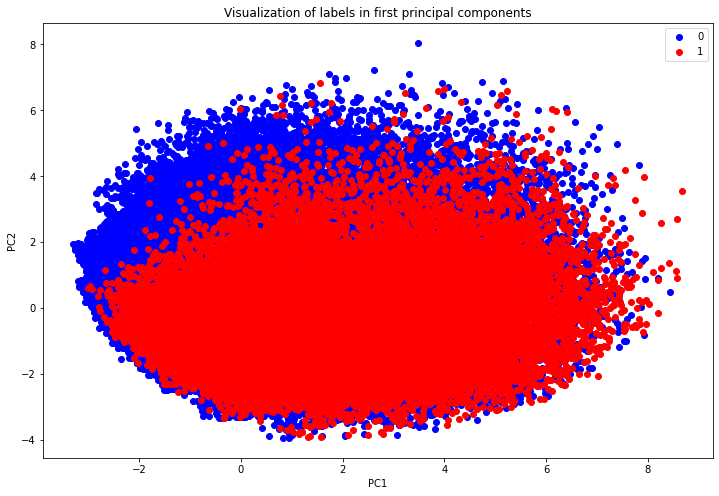

In [19]:
# PCA Plot
y_pca = raw["Diabetes"]
X_pca = raw.drop(["Diabetes","Diabetes_012"],axis=1)
X_pca = (X_pca - X_pca.mean())/(X_pca.std())
pca = PCA(n_components=2).fit(X_pca)
X_pca = pca.transform(X_pca)

plt.figure(figsize=(12,8))
color_dict = {1:"red",0:"blue"}
for label in [0,1]:
    idx = np.where(y_pca==label)
    plt.scatter(X_pca[idx,0],X_pca[idx,1],c=color_dict[label],label=label)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualization of labels in first principal components")
plt.legend()
plt.show()